In [121]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import (hough_line, hough_line_peaks)
import skimage.filters

In [122]:
# Import images
black_background = cv2.cvtColor(cv2.imread("black_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
white_background = cv2.cvtColor(cv2.imread("white_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
red_background = cv2.cvtColor(cv2.imread("red_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
brown_background = cv2.cvtColor(cv2.imread("brown_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
wood_background = cv2.cvtColor(cv2.imread("wood_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
wood2_background = cv2.cvtColor(cv2.imread("wood2_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
carpet_background = cv2.cvtColor(cv2.imread("carpet_background.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)

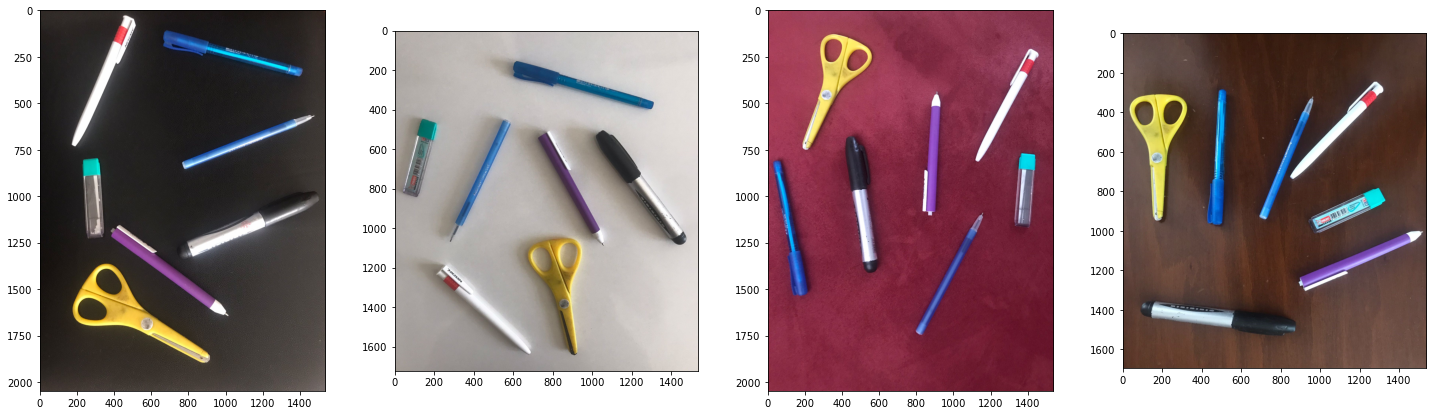

In [123]:
# Displaying images
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,7))
ax1.imshow(black_background)
ax2.imshow(white_background)
ax3.imshow(red_background)
ax4.imshow(brown_background)

In [124]:
image = brown_background # target image
image.shape

(1695, 1536, 3)

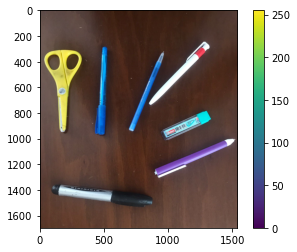

In [125]:
# Display the target image
plt.imshow(image)
plt.colorbar()

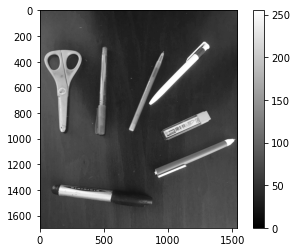

In [126]:
# Converting to gray level
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

Text(0.5, 1.0, 'Edge Detection')

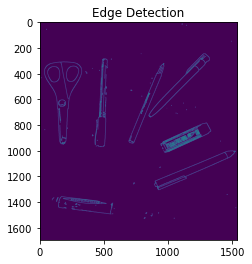

In [127]:
edges = cv2.Canny(gray_image,90,255)
plt.imshow(edges)
plt.title('Edge Detection')

In [128]:
# Contrast adjusting with gamma correction y = 1.2

""" gray_correct = np.array(255 * (gray_image / 255) ** 1.2 , dtype='uint8')
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255) """

' gray_correct = np.array(255 * (gray_image / 255) ** 1.2 , dtype=\'uint8\')\nplt.title(\'Gamma Correction y= 1.2\')\nplt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255) '

(0.0, 1.0)

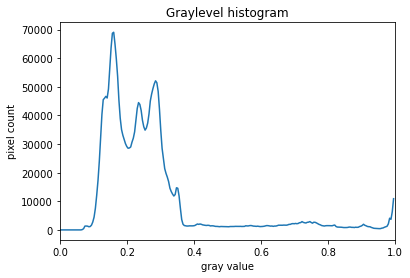

In [129]:
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

# Plot the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

In [130]:
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

Found automatic threshold t = 0.4875294638416492.


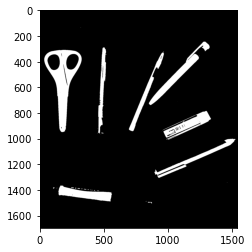

In [131]:
# Threshold found by Otsu's method
thresh = blurred_image > t

# Converting bool to integer
thresh = np.uint8(thresh*1)
thresh = thresh*255

one_count = 0
im_size = thresh.shape[0] * thresh.shape[1]

# Converting backgrounds to black
for i in range(0,thresh.shape[0]):
    for j in range(0,thresh.shape[1]):
        if (thresh[i][j] == 255):
            one_count = one_count + 1

if one_count >= (im_size / 2):
    thresh = cv2.bitwise_not(thresh)

fig, ax = plt.subplots()
plt.imshow(thresh, cmap="gray")

In [132]:
# Blurring the image
#image_blur = cv2.medianBlur(gray_image,9)
#plt.imshow(image_blur,cmap='gray',vmin=0,vmax=255)
#plt.colorbar()

In [133]:
# Thresholding
""" ret, thresh = cv2.threshold(gray_correct, 0, 255, cv2.THRESH_OTSU)
one_count = 0
im_size = thresh.shape[0] * thresh.shape[1]

for i in range(0,thresh.shape[0]):
    for j in range(0,thresh.shape[1]):
        if (thresh[i][j] == 255):
            one_count = one_count + 1

if one_count >= (im_size / 2):
    thresh = cv2.bitwise_not(thresh)

plt.title('Otsu Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255) """

' ret, thresh = cv2.threshold(gray_correct, 0, 255, cv2.THRESH_OTSU)\none_count = 0\nim_size = thresh.shape[0] * thresh.shape[1]\n\nfor i in range(0,thresh.shape[0]):\n    for j in range(0,thresh.shape[1]):\n        if (thresh[i][j] == 255):\n            one_count = one_count + 1\n\nif one_count >= (im_size / 2):\n    thresh = cv2.bitwise_not(thresh)\n\nplt.title(\'Otsu Threshold\')\nplt.imshow(thresh, cmap="gray", vmin=0, vmax=255) '

In [134]:
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(65,65)) # cv2.MORPH_ELLIPSE, cv2.MORP_CROSS
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#plt.imshow(opening,cmap='gray',vmax=255,vmin=0)

Text(0.5, 1.0, 'Opening')

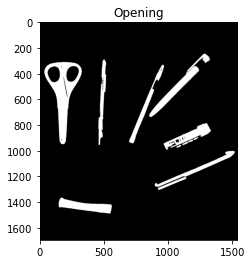

In [135]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones([8,8]))
plt.imshow(opening, cmap='gray')
plt.title('Opening')

Text(0.5, 1.0, 'Dilation')

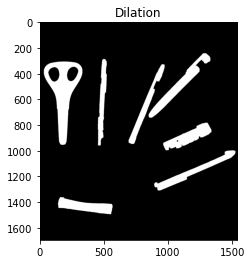

In [136]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
img_dilation = cv2.dilate(opening, kernel, iterations=1)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilation')

objects number is: 7


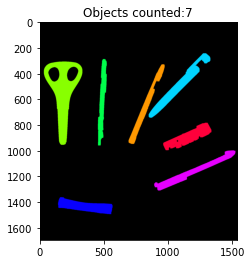

In [137]:
# Labeling
ret, labels = cv2.connectedComponents(img_dilation)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()